In [ ]:
import numpy as np
import timeit 
import matplotlib.pyplot as plt
import time
import pandas as pd

# Q1

Matrix A = m\*k
Matrix B = k\*n

On multiplying matrix A and B we will get an matrix C of dimension m*n

for the resultant matrix C, the element at position (i,j) will be obtained by multipling corresponding elements of ith row of mat A and the jth column of the Matrix B.

no of multiplication operations to obtain each element in matrix C = k

no fo addition operations to compute each element in matrix C  = k-1 

There are m*n elements in  resultant matrix. 

Total no of addition operations in matrix multiplication of A and B = m\*n\*(k-1)
\n
Total no of multiplication operations  = m\*n\*k


# Q2

In [ ]:
import time 
import numpy as np

def matrix_mul(A,B,m1,n1,m2,n2):

    C = [[0]*n2 for  i in range(m1)] 
    for i in range(m1):
        for j in range(n2):
            for k in range(n1):
                C[i][j] += A[i][k]*B[k][j] 
    return C

In [ ]:

def time_(A,B,m1,n1,m2,n2):
        number = 10000
        t_prog = []
        t_numpy = []
        for i in range(number):
            start = time.time()
            C = np.array(matrix_mul(A,B,m1,n1,m2,n2))
            end = time.time()
            t_prog.append((end-start)*1000)

            A,B = np.array(A),np.array(B)
            start = time.time()
            C = np.dot(A,B)
            end = time.time()
            t_numpy.append((end-start)*1000)

        t_prog,t_numpy = np.array(t_prog),np.array(t_numpy)

        mean_p,mean_n,std_p,std_n = np.mean(t_prog),np.mean(t_numpy),np.std(t_prog),np.std(t_numpy)
        return mean_p,mean_n,std_p,std_n


In [ ]:

A = list(np.random.randint(0,10,(3,2)))
B  = list(np.random.randint(0,20,(2,3)))
t_prog = []
t_numpy = []
m1,n1 = len(A),len(A[0])
m2,n2 = len(B),len(B[0])
C = matrix_mul(A,B,m1,n1,m2,n2)
print()
print("Matrix multiplication using numppy")
print(C)
print()
print("Matrix multiplication using numppy")
A = np.array(A)
B = np.array(B)
C1 = np.dot(A,B)
print(C1)

print()
print("Checking both anwer abtained by the program")
print(C == C1)



Matrix multiplication using numppy
[[29, 54, 48], [111, 51, 120], [27, 117, 72]]

Matrix multiplication using numppy
[[ 29  54  48]
 [111  51 120]
 [ 27 117  72]]

Checking both anwer abtained by the program
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [51]:
import time
A = list(np.random.randint(0,100,(100,3)))
B  = list(np.random.randint(0,200,(3,5)))
t_prog = []
t_numpy = []
m1,n1 = len(A),len(A[0])
m2,n2 = len(B),len(B[0])
mean_p,mean_n,std_p,std_n =  time_(A,B,m1,n1,m2,n2)
print("mean and std of written program",mean_p,"ms",std_p,"ms")
print("mean and std of inbuilt numpy",mean_n,"ms",std_n,"ms")


mean and std of written program 1.5077740669250488 ms 0.5943042157660461 ms
mean and std of inbuilt numpy 0.024957275390625 ms 0.121225080549667 ms


 From the above we can observe that the numpy runs faster than the written program. there might be some reasons why numpy is faster.



1.   The numpy module was build using c/c++ which are faster than the python. so numpy is faster.
2.   The accessing in numpy arrays is easy compared to python becausethe memory allocation of the numpy arrays are continous while in python lists the memory allocation is discrete.





# Q3



  median of an array 

suppose the array has n elements

the median of the even length array  =  average value of n/2th maximum and (n/2 +1)th maximum
median of an odd length array  = value of the ((n+1)/2)th maximum


one iteration of array  = n operations

operations required to calculated the medain in array of even length = (n^2)/4) + ((n/2) +1)^2 == O(n^2)

operations req to find the median in an array of odd length = ((n+1)/2)^2 == O(n^2)

Time complexity to find the medain of an array  = O(n^2)


OPTIMSED METHODS TO FIND THE MEDIAN :

 1) Sort the elements in the array and find the median of an array. Time Complexity  = O(nlog(n))).
 2) if the range of values in the array are small. we can use counting sort for sorting which has the time complexity of O(n). Time complexity  = O(n) 


 


 


In [ ]:
def find_median(A):
    n = len(A)
    freq = {}
    for i in range(n//2 +1):
        max_index = -1
        for j in range(n):
            freq.setdefault(j,-1)
            if freq[j] == -1 : 
                if max_index == -1 :
                    max_index = j

                if A[j] >= A[max_index] : 
                    max_index = j
        if i == n//2 -1 :
                max1 = A[max_index]
        if i == n//2 :
                max2 = A[max_index]
        freq[max_index] = 1
    if n%2 == 0 :
         median  = (max1+max2)/2
    else:
        median = max2
    return median
  
    
def opti_median(arr):
    n = len(arr)
    arr.sort()
    if n%2 == 0 :
        return (arr[n//2]+arr[n//2 -1])/2
    else:
        return arr[n//2]

def time_1(A):
    t_prog,t_opt,t_np = [],[],[]
    number = 1000
    for i in range(number):
        start = time.time()
        C = find_median(A)
        end = time.time()
        t_prog.append((end-start)*1000)
        start = time.time()
        c = opti_median(A)
        end = time.time()
        t_opt.append((end-start)*1000)
        start = time.time()
        c = np.median(A)
        end = time.time()
        t_np.append((end-start)*1000)
    prog_t,prog_std = np.mean(np.array(t_prog)),np.std(np.array(t_prog))
    opt_t,opt_std = np.mean(np.array(t_opt)),np.std(np.array(t_opt))
    np_t,np_std = np.mean(np.array(t_np)),np.std(np.array(t_np))
    return prog_t,prog_std, opt_t,opt_std,np_t,np_std


In [67]:
A = np.random.randint(0,100,(4))
print(A)
median = find_median(A)
print("The median of array A using brute force method is "+ str(median))
print()
median = opti_median(A)
print("The median of array A using optimised method "+ str(median))
print()
print("median of array A using numpy : "+ str(np.median(A)))
print()


[82 58 84 20]
The median of array A using brute force method is 70.0

The median of array A using optimised method 70.0

median of array A using numpy : 70.0



In [ ]:
A = np.random.randint(0,100,(100))
prog_t,prog_std, opt_t,opt_std,np_t,np_std  = time_1(A)
print("execution time of the find median program", prog_t,"ms",prog_std,"ms")
print("execution time of the optimed program",opt_t,opt_std)
print("execution time of numpy.median ",np_t,"ms",np_std,"ms")


execution time of the find median program 2.162513494491577 ms 0.9624602835894503 ms
execution time of the optimed program 0.014060735702514648 0.08804809113449681
execution time of numpy.median  0.08085513114929199 ms 0.07562278559219969 ms


# Q4


$     Given\: Function = x^{2}y + y^{3}sin(x)  \\ \\  Diff \:wrt\: x =  2xy + y^{3}cos(x) \\  \\ Diff\:wrt\: y =  x^{2} + 3y^{2}sin(x) $






# Q5


In [47]:
import jax
import jax.numpy as jnp
from jax import random
import numpy as np


In [42]:
def f(x):
  k,l = x[0],x[1]
  return (k**2)*l+ (l**3)*jnp.sin(k)
def diff_fxy(x):
  k,l = x[0],x[1]
  return 2*k*l + (l**3)*jnp.cos(k), (k**2) + 3*(l**2)*jnp.sin(k)

In [43]:
gradf = jax.grad(f)

In [49]:
x=np.random.uniform(1,2,(10,2))
x=jnp.array(x)
for i in range(10):

  print(f"gradient from jax {gradf(x[i])} |gradinet computed manullay {diff_fxy(x[i])[0]} {diff_fxy(x[i])[1]}  ")

gradient from jax [ 5.9552655 12.547184 ] |gradinet computed manullay 5.955265522003174 12.547183990478516  
gradient from jax [3.9222474 7.421175 ] |gradinet computed manullay 3.9222474098205566 7.421175003051758  
gradient from jax [3.0269434 5.0849476] |gradinet computed manullay 3.0269434452056885 5.08494758605957  
gradient from jax [4.1361356 8.1027775] |gradinet computed manullay 4.136135578155518 8.102777481079102  
gradient from jax [3.7942023 7.1030254] |gradinet computed manullay 3.7942023277282715 7.103025436401367  
gradient from jax [3.754529  6.2119884] |gradinet computed manullay 3.7545289993286133 6.21198844909668  
gradient from jax [3.34439  5.993205] |gradinet computed manullay 3.3443899154663086 5.9932050704956055  
gradient from jax [4.123152 7.450735] |gradinet computed manullay 4.123151779174805 7.450735092163086  
gradient from jax [ 4.7453547 10.969198 ] |gradinet computed manullay 4.745354652404785 10.969198226928711  
gradient from jax [3.274139  5.4158983] 

# Q6

In [ ]:
import sympy as sp
x = sp.Symbol('x')
y = sp.Symbol('y')
z = (x**2)*y + (y**3)*sp.sin(x)
print("Given Function: ",z)
print("diff wrt x: ",sp.diff(z,x))
print("diff wrt y:", sp.diff(z,y))

Given Function:  x**2*y + y**3*sin(x)
diff wrt x:  2*x*y + y**3*cos(x)
diff wrt y: x**2 + 3*y**2*sin(x)


# Q7


In [ ]:
            
school_database = {}

#data for year 2022
year_2022 = {}
b1_2022 = {}
b1_s1_2022 = {"Name":"sunny" , "Marks": {"Maths": 100, "English": 70 } }
b1_s2_2022 = {"Name":"sandy" , "Marks": {"Maths": 98, "English": 70 } }
b1_2022[1] = b1_s1_2022
b1_2022[2] = b1_s2_2022

b2_2022 = {}

year_2022[1] = b1_2022
year_2022[2]  = b2_2022


# data for year 2023
year_2023 = {}
b1_2023 = {}
b2_2023 = {}
#loading data batch wise in year 2023
year_2023[1],year_2023[2] = b1_2023,b2_2023


#loading yearly wise data in the school database

school_database[2022] = year_2022
school_database[2023] = year_2023


print(school_database)

{2022: {1: {1: {'Name': 'sunny', 'Marks': {'Maths': 100, 'English': 70}}, 2: {'Name': 'sandy', 'Marks': {'Maths': 1001, 'English': 70}}}, 2: {}}, 2023: {1: {}, 2: {}}}


# Q8


In [60]:


        

    
class  college:
    
    def __init__(self, name):
        self.college_name = name
        self.years = []
        
    def add_student(self,year_,branch_,Name,Roll_no,subject,marks):
       
        year_obj = None
        for i in self.years:
            if i.academic_year == year_ :           
                year_obj = i
                break
        
        if year_obj == None : 
            year_obj = year(year_)
            self.years.append(year_obj)
        year_obj.add_student(branch_,Name,Roll_no,subject,marks)
        
    def display(self,year = None,Branch = None, Roll_no = None):
            print("fetching the information")
            for i in self.years:
                    if year == None or i.academic_year == year : 
                        print(i.academic_year)
                        for j in i.branches : 
                            if Branch == None or Branch == j.branch_name : 
                              print(f" {j.branch_name}")
                              for k in j.students :
                                    if Roll_no ==  None or k.Roll_no == Roll_no : 
                                         print(f"Name : {k.Name}, Roll_no : {k.Roll_no}, Branch : {j.branch_name}, Subjects: {k.subjects}, Marks : {k.marks}")
                                         print()  

    
        
class year : 
    
    def __init__(self,year):
        self.academic_year = year
        self.branches = []
        self.branches_no = 0
    def add_student(self,branch_,Name,Roll_no,subject,marks):
        # print("updating the database of the Academic Year "+str(self.academic_year))
        branch_obj = None
        for i in self.branches:
            if i.branch_name == branch_ : 
                branch_obj = i
                break
        if branch_obj == None : 
            self.branches_no += 1
            
            # print("adding_new_database")
    
            branch_obj = branch(branch_)
            self.branches.append(branch_obj)
        
        branch_obj.add_student(Name,Roll_no,subject,marks)      
            


class branch:
    
    def __init__(self,name):
        self.branch_name = name
        self.students = []
        self.students_no = 0
    def add_student(self,Name,roll_no,subject,marks):
        # print("updating the dabase of the branch "+self.branch_name)
        student_obj = None 
        for i in self.students : 
            if i.Roll_no == roll_no : 
                print("student_already exits in database")
                student_obj =  i
                break
        if student_obj == None : 
            
            student_obj = student(Name,roll_no,subject,marks)
            self.students_no += 1 
            self.students.append(student_obj)
            print("The student " +Name+ " succefully added to the database")

            
            
class student:
    
    def __init__(self,Name,Roll_no,subjects,marks):
        self.Name = Name
        self.Roll_no = Roll_no
        self.marks = marks
        self.subjects = subjects
        
        

                
        
        



In [65]:

#to add data functin format : add_student(self,year_,branch_,Name,Roll_no,subject,marks) 
#fetch data function format : display(self,year = None,Branch = None, Roll_no = None)
IItgn = college("IITGN")
IItgn.add_student(2022,"Electrical","Sunny",2011000,["English"],[90])
print()
IItgn.add_student(2022,"Electrical","siva",2011001,["English"],[90])
print()
IItgn.add_student(2022,"Electrical","manish",2011002,["English"],[90])
IItgn.add_student(2022,"Chemical","absd",20110062,["English"],[90])

IItgn.add_student(2023,"CSE","absds",20110062,["English"],[90])
IItgn.add_student(2023,"Electrical","Sunny",2011010,["English"],[90])
print()
IItgn.add_student(2023,"Electrical","siva",2011011,["English"],[90])

The student Sunny succefully added to the database

The student siva succefully added to the database

The student manish succefully added to the database
The student absd succefully added to the database
The student absds succefully added to the database
The student Sunny succefully added to the database

The student siva succefully added to the database


In [66]:

IItgn.display()

fetching the information
2022
 Electrical
Name : Sunny, Roll_no : 2011000, Branch : Electrical, Subjects: ['English'], Marks : [90]

Name : siva, Roll_no : 2011001, Branch : Electrical, Subjects: ['English'], Marks : [90]

Name : manish, Roll_no : 2011002, Branch : Electrical, Subjects: ['English'], Marks : [90]

 Chemical
Name : absd, Roll_no : 20110062, Branch : Chemical, Subjects: ['English'], Marks : [90]

2023
 CSE
Name : absds, Roll_no : 20110062, Branch : CSE, Subjects: ['English'], Marks : [90]

 Electrical
Name : Sunny, Roll_no : 2011010, Branch : Electrical, Subjects: ['English'], Marks : [90]

Name : siva, Roll_no : 2011011, Branch : Electrical, Subjects: ['English'], Marks : [90]



# Q9

Plot of y = x


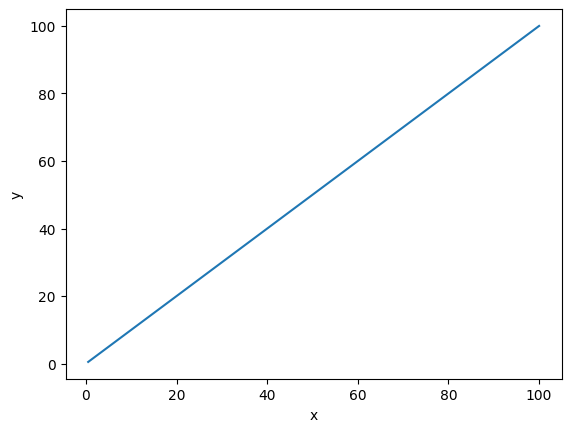

In [ ]:
x = np.arange(0.5,100.5,0.5)
y = x
print("Plot of y = x")
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Plot of y = x^2


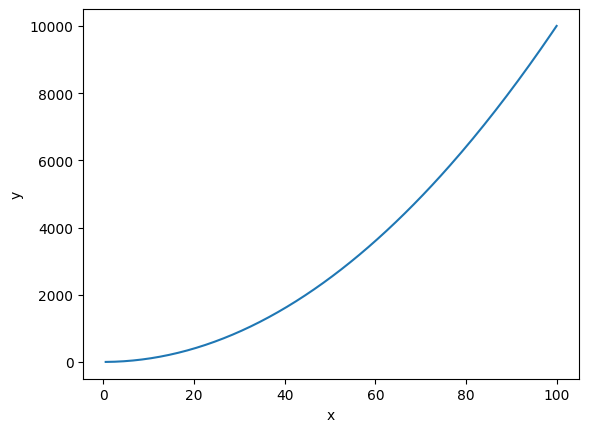

In [ ]:
x = np.arange(0.5,100.5,0.5)
y = np.square(x)
print("Plot of y = x^2")
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Plot of y = (x^3)/1000


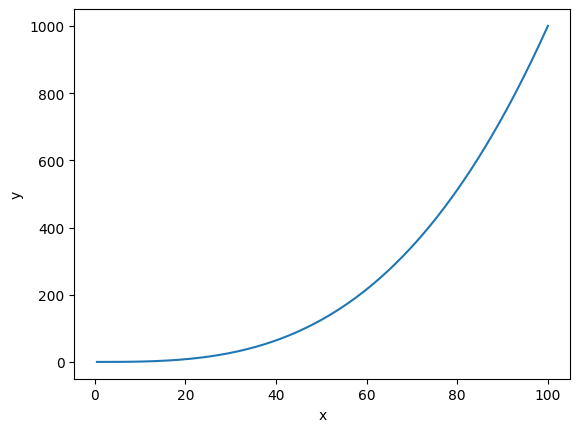

In [ ]:
x = np.arange(0.5,100.5,0.5)
y = np.power(x,3)/1000
print("Plot of y = (x^3)/1000")
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Plot of y = sinx


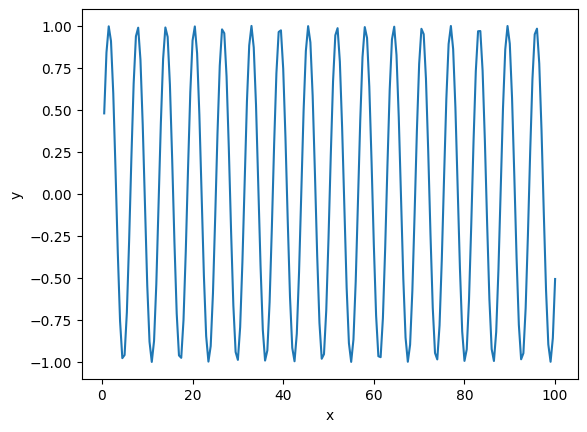

In [ ]:
x = np.arange(0.5,100.5,0.5)
y = np.sin(x)
print("Plot of y = sinx")
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Plot of y = sinx/x


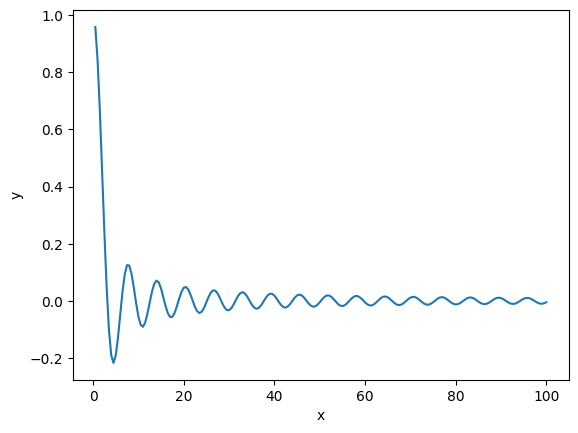

In [ ]:
x = np.arange(0.5,100.5,0.5)
y = np.sin(x)/x
print("Plot of y = sinx/x")
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Plot of y = log(x)


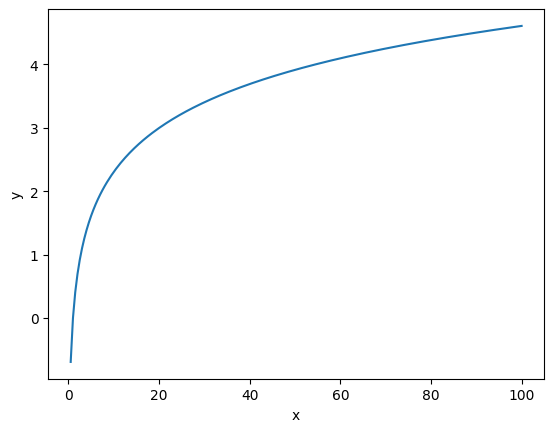

In [ ]:
x = np.arange(0.5,100.5,0.5)
y = np.log(x)
print("Plot of y = log(x)")
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Plot of y = e^x


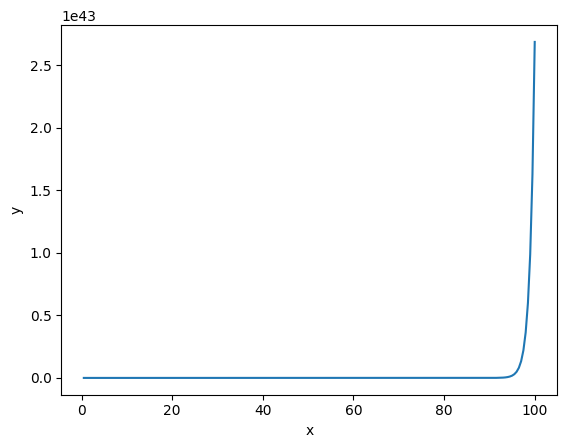

In [ ]:
x = np.arange(0.5,100.5,0.5)
y = np.exp(x)

print("Plot of y = e^x")
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Q 10


In [ ]:
data = np.random.uniform(1,2,(20,5))

df = pd.DataFrame(data,columns = ["a","b","c","d","e"])

std = df.std()
print("std of each column")
print(std)
max_ = 0
for i in range(1,5):
    if std[max_] <=  std[i] :
        max_  = i
print("column with high std is : " + str(df.columns[max_]))

print()
print("mean_of_each_column")
mean  = df.mean()
print(mean)
min_ = 0 
for  i in range(1,5):
    if std[min_] >= std[i] : 
        min_ = i
print()
print("column with lowest mean is : " + str(df.columns[min_]))
    
    


std of each column
a    0.349261
b    0.323613
c    0.284724
d    0.254715
e    0.296448
dtype: float64
column with high std is : a

mean_of_each_column
a    1.453358
b    1.535023
c    1.492404
d    1.503779
e    1.451792
dtype: float64

column with lowest mean is : d


# Q11

In [ ]:
df["f"] = 0
df["f"]=df.sum(axis = 1)

df["g"] = df["f"].apply(lambda row: "LT8" if row < 8  else "GT8")

print(len(df[df["g"] == "LT8"]))

print(df["f"][df["g"] == "LT8"].std(),df["f"][df["g"] == "GT8"].std())

df


15
0.459965810196768 0.23096525624233144


C:\Users\ganga\AppData\Local\Temp\ipykernel_16336\3009241821.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["f"]=df.sum(axis = 1)


,a,b,c,d,e,f,g
0,1.917017,1.889783,1.491104,1.167101,1.720613,8.185618,GT8
1,1.096719,1.003336,1.907437,1.291434,1.468068,6.766994,LT8
2,1.839212,1.978620,1.038673,1.816090,1.414001,8.086596,GT8
3,1.030307,1.407408,1.094357,1.543317,1.532108,6.607497,LT8
4,1.885076,1.700219,1.625574,1.948672,1.041769,8.201310,GT8
5,1.151110,1.176775,1.416881,1.841847,1.821691,7.408304,LT8
6,1.525400,1.481976,1.857433,1.604206,1.326579,7.795595,LT8
7,1.344522,1.461361,1.379524,1.551999,1.765787,7.503192,LT8
8,1.235030,1.985971,1.912258,1.300118,1.845165,8.278543,GT8
9,1.991955,1.171181,1.378770,1.359153,1.047787,6.948845,LT8


# Q12

In [ ]:

A = np.array([5,2,3])
B = 3 
C = np.zeros(A.shape)
for i in range(3):
    C[i] = A[i] +3

print(C)
print()
C = A+B  #broadcasting happens here
print(C)
print()

A = np.array([[10,2],[3,0],[0,6]])
B = np.array([1,1])
C = np.zeros(A.shape)
for i in range(3):
    for j in range(2):
        C[i][j] =  A[i][j] + B[j]
print(C)
print()
C = A+B

print(C)
print()



[8. 5. 6.]

[8 5 6]

[[11.  3.]
 [ 4.  1.]
 [ 1.  7.]]

[[11  3]
 [ 4  1]
 [ 1  7]]



From the above example of Addition of two Arrays A and B of dimensions (3,2) and (1,2) . both the arrays have different dimensions. The addition operation of both the arrays will be performed by stretching(intutive) the array B to the dimension (3,2). The is nothing but the brodcasting.

# Q13

In [ ]:
def min_ind(arr):
    arr = arr.flatten()
    min_index = 0
    n = len(arr)
    for i in range(n):
        if arr[i]  < arr[min_index] : 
            min_index = i
    return min_index

A = np.array([[10,2],[3,0],[0,6]])
print("Argim computed from above program " + str(min_ind(A)))
print("Argmin using numpy: " + str(np.argmin(A)))
    